# Lab 6: Transformations and Linear Regression

## Objectives

- Use tranformations to linearize the data.
- Fit a linear regression model to the transformed data.
- Make a predictions using your model.

## Dataset

For this lab, we will be using synthetic data for house size (sq ft) and house price (thousands of dollars). You can download it [here](https://drive.google.com/uc?export=download&id=1LhiiA2_Rcu6DVqbMwMQY9Cfj92VFiJJ8). In the csv, there are 2 columns: `Size` and `Price`.

### 1. Load Data and Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('data.csv') # Your code here
print("First 5 rows of the generated data:")
print(data.head())

First 5 rows of the generated data:
          Size     Price
0  1347.930231  2.368646
1  2507.146699  5.132354
2  3635.544361  7.982506
3  2642.351537  5.815469
4  2060.411328  3.595922


### 2. Explore the Data

- Plot `Size` vs `Price`.

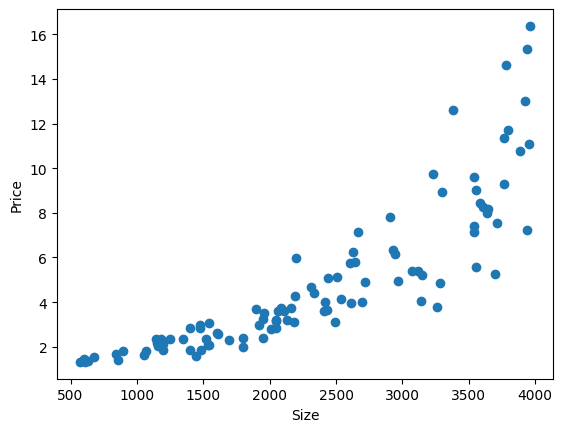

In [16]:
# Your code here
plt.scatter(data['Size'], data['Price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

### 3. Transform the Data

- Find transformations to linearize the data.
- Apply transformations.
- Plot the transformed data.

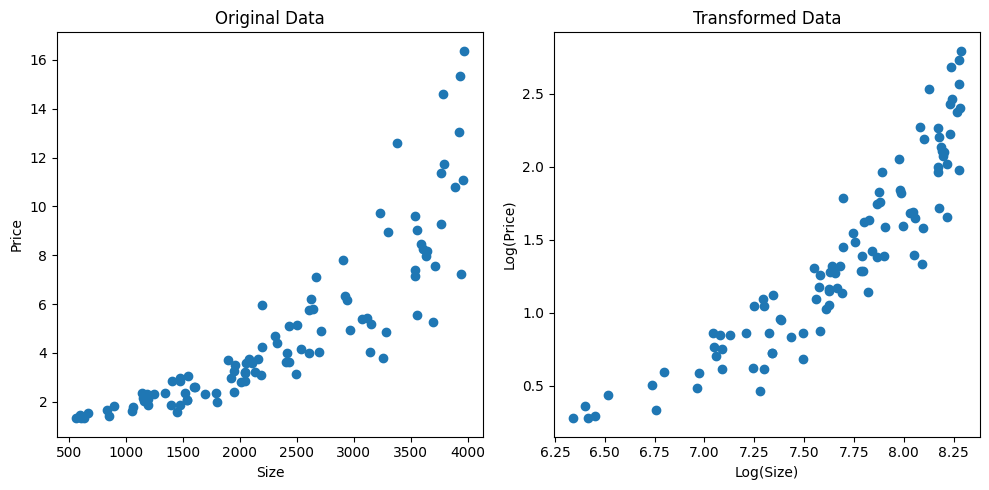

In [30]:
# Your code here
# Data transformation: Apply log transformation to both variables == Power Relationship
data['log_size'] = np.log(data['Size'])
data['log_price'] = np.log(data['Price'])

# Visualize the transformed data
plt.figure(figsize=(10, 5))

# Original data plot
plt.subplot(1, 2, 1)
plt.scatter(data['Size'], data['Price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Original Data')

# Transformed data plot
plt.subplot(1, 2, 2)
plt.scatter(data['log_size'], data['log_price'])
plt.xlabel('Log(Size)')
plt.ylabel('Log(Price)')
plt.title('Transformed Data')

plt.tight_layout()
plt.show()

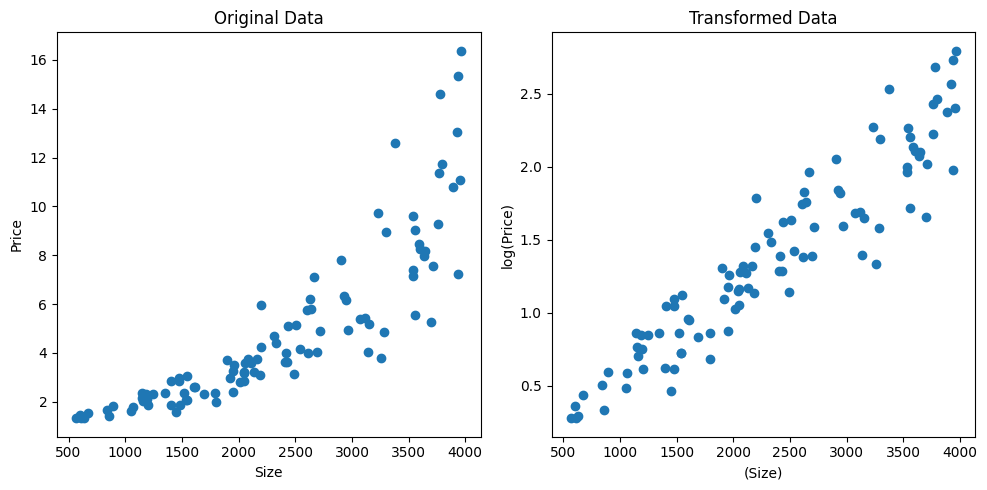

In [31]:
# Your code here
# Data transformation: Apply log transformation to both variables == Power Relationship
data['log_size'] = np.log(data['Size'])
data['log_price'] = np.log(data['Price'])

# Visualize the transformed data
plt.figure(figsize=(10, 5))

# Original data plot
plt.subplot(1, 2, 1)
plt.scatter(data['Size'], data['Price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Original Data')

# Transformed data plot
plt.subplot(1, 2, 2)
plt.scatter(data['Size'], data['log_price'])
plt.xlabel('(Size)')
plt.ylabel('log(Price)')
plt.title('Transformed Data')

plt.tight_layout()
plt.show()

### 4. Fit Linear Model

- Fit the regression model to transformed data.
- Report your obtained coefficients.

In [36]:
# Your code here
model = LinearRegression()
model.fit(data[['Size']], data['log_price'])
print(f"Coefficients: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficients: 0.0006103214437578724
Intercept: -0.04616772548130155


### 5. Residuals

- Check the residuals for to verify that transformations were helpful by creating a plot with the residuals on the y-axis and the predicted values on the x-axis.

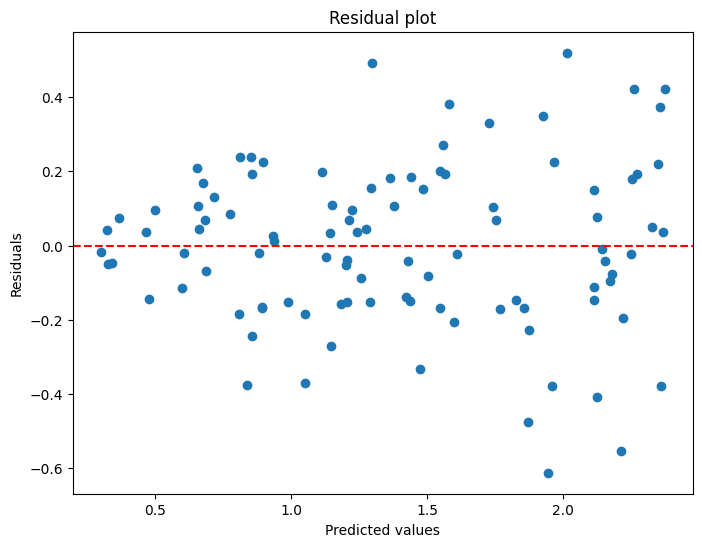

In [33]:
# Your code here
# Predicted values
y_pred = model.predict(data[['Size']])

# Residuals
residuals = data['log_price'] - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()


### 6. Predict

- Predict the price for a 2500 sq ft house.
- Convert prediction back to original scale (it is currently in the transformed scale).

In [37]:
# Your code here
# Transform 2500 sq ft to log scale
house_size = 2500

# Predict the price in log scale
log_price_pred = model.predict([[house_size]])

# Convert prediction back to original scale (exponential transformation)
price_pred = np.exp(log_price_pred)

print(f"2500 sq ft price prediction: ${price_pred[0]:.2f}")



2500 sq ft price prediction: $4.39


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 7. Submit Results

- Show your code cell outputs and your plots to the TA